This is how much space the figure will take up on letter paper


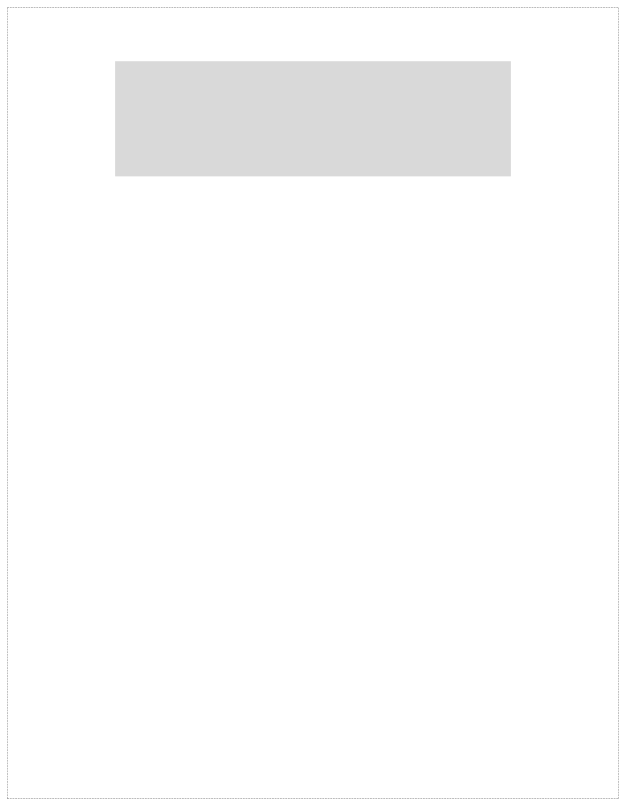

In [1]:
__PRODUCTION__ = 0
__NAME__       = 'motivation'
__WIDTH__      = 5.5  # NeurIPS 2021 text box width
__HEIGHT__     = 1.6

if __PRODUCTION__:
    from mplmagic import pgf
else:
    from mplmagic import svg

from mplmagic.util import SuperFigure, SuperAxes, size_hint
import matplotlib.pyplot as plt

print('This is how much space the figure will take up on letter paper')
size_hint(__WIDTH__, __HEIGHT__, margin_left=0.5 * (8.5 - __WIDTH__));

In [2]:
import functools
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.spatial.distance import cdist
import torch
import torch.nn.functional as F
from torch import optim
import networkx as nx
import pickle
from sklearn import metrics

from symfac.experimental import RBFExpansionV2

In [3]:

n = 40
A = nx.generators.random_graphs.barabasi_albert_graph(n, 3)
K0 = nx.to_numpy_array(A)
K0 = torch.tensor(K0, dtype=torch.float32)

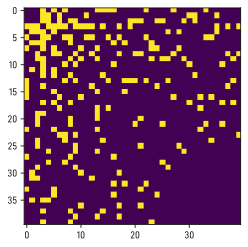

In [4]:
plt.imshow(K0)

In [18]:
def find_svd(K0):
    U, S, V = np.linalg.svd(K0.detach().numpy())
    s_vals = []
    for k in range(1, min(K0.size()[0], K0.size()[1]) + 1):
        s_vals.append(round(float(F.mse_loss(torch.tensor((U[:, :k] * S[None, :k]) @ V[:k, :]), K0)), 8)
    )
    return s_vals

In [19]:
s_vals = find_svd(K0)

In [20]:
s_vals

[0.10569052,
 0.09250233,
 0.08251435,
 0.07327878,
 0.06511705,
 0.05769653,
 0.05155763,
 0.04598587,
 0.04076522,
 0.03683642,
 0.03299293,
 0.02942057,
 0.02607701,
 0.0228762,
 0.01968532,
 0.01685729,
 0.01404565,
 0.01192601,
 0.01027484,
 0.00866827,
 0.00717881,
 0.00588199,
 0.00483825,
 0.00393331,
 0.00330981,
 0.00270859,
 0.00214875,
 0.00172269,
 0.0013312,
 0.00100495,
 0.00076047,
 0.00052879,
 0.00036807,
 0.00022472,
 0.00013576,
 6.796e-05,
 3.454e-05,
 4.84e-06,
 0.0,
 0.0]

  0%|          | 0/30000 [00:00<?, ?it/s]

6


100%|██████████| 30000/30000 [11:19<00:00, 44.12it/s]


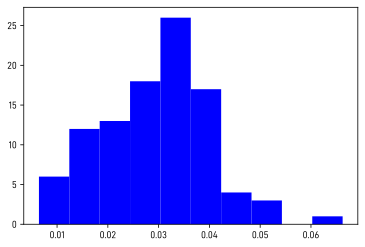

0.0064315


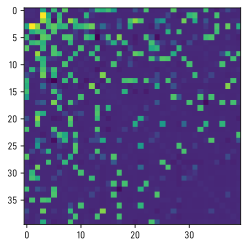

  0%|          | 0/30000 [00:00<?, ?it/s]

7


100%|██████████| 30000/30000 [05:52<00:00, 85.04it/s] 


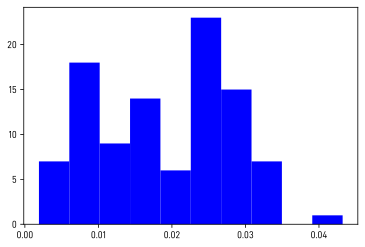

0.0019147


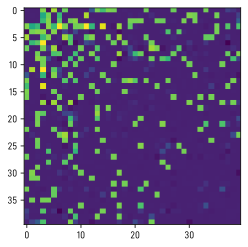

  0%|          | 0/30000 [00:00<?, ?it/s]

8


100%|██████████| 30000/30000 [00:52<00:00, 568.85it/s]


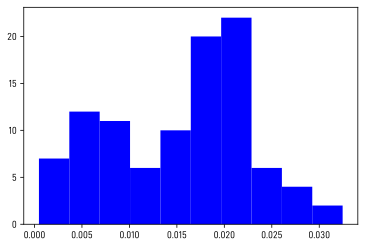

0.0004693


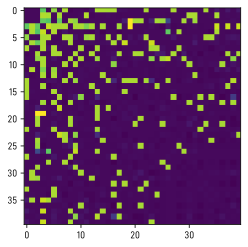

  0%|          | 0/30000 [00:00<?, ?it/s]

9


100%|██████████| 30000/30000 [00:54<00:00, 551.21it/s]


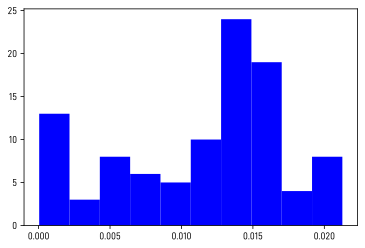

4.17e-05


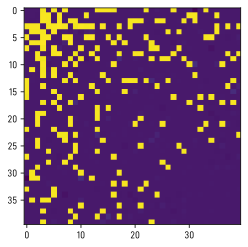

  0%|          | 0/30000 [00:00<?, ?it/s]

10


100%|██████████| 30000/30000 [00:54<00:00, 553.47it/s]


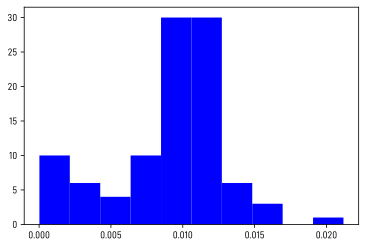

2.23e-05


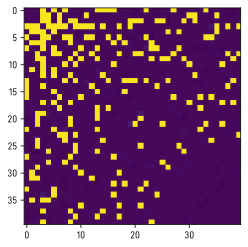

[0.0064315, 0.0019147, 0.0004693, 4.17e-05, 2.23e-05]


In [17]:
errors = []
bs=100
for k in range(6,11):
    print(k)
    u0=1/1000*torch.randn([bs, len(K0), k]) 
    a=torch.randn([bs, k], device="cuda")
    b=torch.randn([bs], device="cuda")
    fac = RBFExpansionV2(k=k, batch_size=bs, max_steps=30000)
    fac.fith(
        K0,
        u0=u0,
        a0=a,
        b0=b
    )
    plt.hist(fac.report.loss_best, color='b', label='1')
    plt.show()

    plt.show()
    error = fac.report.loss_best
    er = round(float(torch.min(error).cpu().detach().numpy()), 7)
    print(er)
    errors.append(er)
    plt.imshow(fac.optimum(runs=torch.argmin(fac.report.loss_best)))
    plt.show()
    #open('er_{0}.pickle'.format(k), 'wb').write(pickle.dumps(fac.optimum.x))
print(errors)

In [33]:
open('bs_losses.pickle', 'wb').write(pickle.dumps([errs,svals]))

474

In [129]:
errs,svals = pickle.load(open("er_losses.pickle", "rb"))

In [29]:
errs2 = [0.0961636, 0.0679386, 0.0440048, 0.0208319, 0.0107977, 0.005963, 0.0008099, 0.0004693, 4.17e-05, 2.23e-05]
errs = [round(x,4) for x in errs2]

In [31]:
svals = [round(x,4) for x in s_vals]


In [32]:
svals

[0.1057,
 0.0925,
 0.0825,
 0.0733,
 0.0651,
 0.0577,
 0.0516,
 0.046,
 0.0408,
 0.0368,
 0.033,
 0.0294,
 0.0261,
 0.0229,
 0.0197,
 0.0169,
 0.014,
 0.0119,
 0.0103,
 0.0087,
 0.0072,
 0.0059,
 0.0048,
 0.0039,
 0.0033,
 0.0027,
 0.0021,
 0.0017,
 0.0013,
 0.001,
 0.0008,
 0.0005,
 0.0004,
 0.0002,
 0.0001,
 0.0001,
 0.0,
 0.0,
 0.0,
 0.0]

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

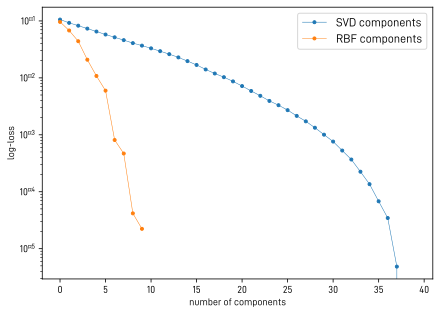

In [26]:
plt.figure(figsize=(7, 5))
plt.plot(range(len(s_vals)), s_vals, '.-', label='SVD components')
plt.plot(range(len(errs2)), errs2, '.-',label='RBF components')
plt.ylabel('log-loss')
plt.yscale('log')
plt.xlabel('number of components')
plt.legend(loc='upper right', fontsize=12)
#plt.title('Graph kernel 256*256')
plt.show()

In [44]:
errs = [round(float(errors[i].cpu().detach().numpy()), 7) for i in range(len(errors))]

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

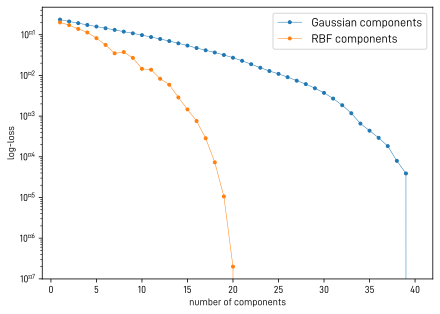

In [106]:
plt.figure(figsize=(7, 5))
plt.plot(range(1, K00.shape[0]+1), s_vals, '.-', label='Gaussian components')
plt.plot(range(1, len(errs)+1), errs, '.-',label='RBF components')
plt.ylabel('log-loss')
plt.yscale('log')
plt.xlabel('number of components')
plt.legend(loc='upper right', fontsize=12)
#plt.title('Graph kernel 256*256')
plt.show()

In [6]:
s_vals = []
U0, S0, V0 = np.linalg.svd(K00.detach().numpy())
for s in range(1, K00.shape[0]+1):
    s_vals.append(round(float(F.mse_loss(torch.tensor((U0[:, :s] * S0[None, :s]) @ V0[:s, :]), K00)),7))

In [7]:
s_vals

[0.2363018,
 0.2120082,
 0.1927711,
 0.1741255,
 0.1590976,
 0.1443937,
 0.131749,
 0.1193682,
 0.1084128,
 0.0979427,
 0.0877641,
 0.0787542,
 0.0700078,
 0.0615597,
 0.0542133,
 0.0471951,
 0.041514,
 0.0365852,
 0.0318286,
 0.0272416,
 0.0228975,
 0.0188536,
 0.0154584,
 0.0128366,
 0.0109367,
 0.0090615,
 0.0074274,
 0.006122,
 0.0048382,
 0.0037293,
 0.0027037,
 0.0018504,
 0.0011752,
 0.0006553,
 0.0004387,
 0.0002926,
 0.0001832,
 7.96e-05,
 3.9e-05,
 0.0]

Rank 2 approximation comparison

In [56]:
def threshold(alpha, array):
    tresholded_array = torch.randn(array.shape)
    tresholded_array[array < alpha] = 0
    tresholded_array[array >= alpha] = 1
    return tresholded_array

100%|██████████| 10000/10000 [00:26<00:00, 373.46it/s]


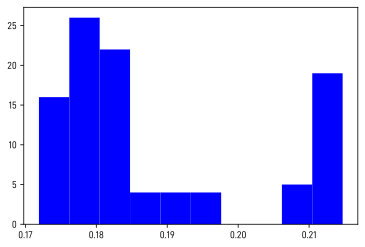

0.1719097


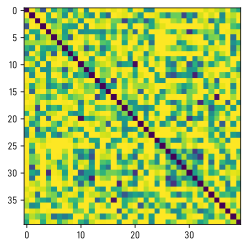

[0.1719097]


In [30]:
errors = []
bs=100
for k in range(2,3):
    u0=1/1000*torch.randn([bs, len(K00), k]) 
    a=torch.randn([bs, k], device="cuda")
    b=torch.randn([bs], device="cuda")
    fac = RBFExpansionV2(k=k, batch_size=bs, max_steps=10000)
    fac.fith(
        K00,
        u0=u0,
        a0=a,
        b0=b
    )
    plt.hist(fac.report.loss_best, color='b', label='1')
    plt.show()

    plt.show()
    error = fac.report.loss_best
    er = round(float(torch.min(error).cpu().detach().numpy()), 7)
    print(er)
    errors.append(er)
    plt.imshow(fac.optimum(runs=torch.argmin(fac.report.loss_best)))
    plt.show()
    open('er_{0}.pickle'.format(k), 'wb').write(pickle.dumps(fac.optimum.x))
print(errors)

In [31]:
rank2_approx = fac.optimum(runs=torch.argmin(fac.report.loss_best))

In [32]:
svd2_approx = torch.tensor((U0[:, :2] * S0[None, :2]) @ V0[:2, :])

In [33]:
from sklearn import metrics
y = K00.numpy().flatten()
pred = rank2_approx.numpy().flatten()
pred_svd = svd2_approx.numpy().flatten()

fpr2, tpr2, thresholds = metrics.roc_curve(y, pred)
print(metrics.auc(fpr2, tpr2))
fpr_svd2, tpr_svd2, thresholds2 = metrics.roc_curve(y, pred_svd)
print(metrics.auc(fpr_svd2, tpr_svd2))

0.8117461571253041
0.7236390079991976


<function matplotlib.pyplot.show(*args, **kw)>

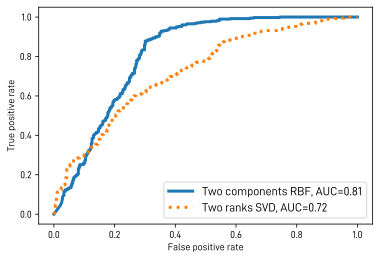

In [34]:
plt.plot(fpr2, tpr2, label='Two components RBF, AUC=0.81',  linewidth=3, linestyle='-')
plt.plot(fpr_svd2, tpr_svd2, label='Two ranks SVD, AUC=0.72',  linewidth=3, linestyle=':')
plt.legend(loc='lower right', fontsize=12)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show


In [35]:
open('er_auc_2.pickle', 'wb').write(pickle.dumps([fpr2, tpr2, fpr_svd2, tpr_svd2]))

12977

Rank 2 approximation comparison

100%|██████████| 10000/10000 [00:25<00:00, 388.68it/s]


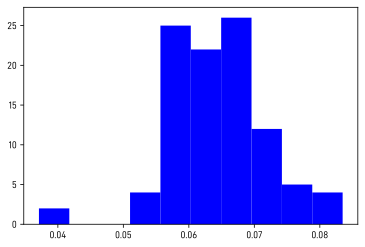

0.0371118


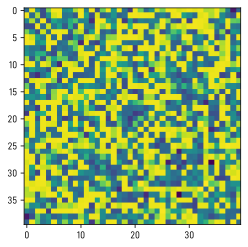

[0.0371118]


In [15]:
errors = []
bs=100
for k in range(7,8):
    u0=1/1000*torch.randn([bs, len(K00), k]) 
    a=torch.randn([bs, k], device="cuda")
    b=torch.randn([bs], device="cuda")
    fac = RBFExpansionV2(k=k, batch_size=bs, max_steps=10000)
    fac.fith(
        K00,
        u0=u0,
        a0=a,
        b0=b
    )
    plt.hist(fac.report.loss_best, color='b', label='1')
    plt.show()

    plt.show()
    error = fac.report.loss_best
    er = round(float(torch.min(error).cpu().detach().numpy()), 7)
    print(er)
    errors.append(er)
    plt.imshow(fac.optimum(runs=torch.argmin(fac.report.loss_best)))
    plt.show()
    #open('er_{0}.pickle'.format(k), 'wb').write(pickle.dumps(fac.optimum.x))
print(errors)

In [16]:
rank7_approx = fac.optimum(runs=torch.argmin(fac.report.loss_best))

In [18]:
svd7_approx = torch.tensor((U0[:, :7] * S0[None, :7]) @ V0[:7, :])

In [24]:
y = K00.numpy().flatten()

In [26]:
pred_7 = rank7_approx.numpy().flatten()
pred_svd_7 = svd7_approx.numpy().flatten()

fpr, tpr, thresholds = metrics.roc_curve(y, pred_7)
print(metrics.auc(fpr, tpr))
fpr_svd7, tpr_svd7, thresholds_svd7 = metrics.roc_curve(y, pred_svd_7)
print(metrics.auc(fpr_svd7, tpr_svd7))

0.9896499410717421
0.9072757591714937


<function matplotlib.pyplot.show(*args, **kw)>

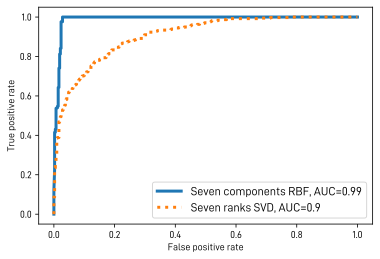

In [28]:
plt.plot(fpr, tpr, label='7 components RBF, AUC=0.99',  linewidth=3, linestyle='-')
plt.plot(fpr_svd7, tpr_svd7, label='7 ranks SVD, AUC=0.9',  linewidth=3, linestyle=':')
plt.legend(loc='lower right', fontsize=12)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show

In [29]:
open('er_auc_7.pickle', 'wb').write(pickle.dumps([fpr, tpr, fpr_svd7, tpr_svd7]))

8241

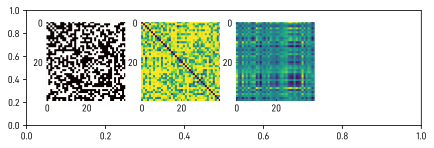

In [124]:
fig = SuperFigure(plt.figure(figsize=(__WIDTH__, __HEIGHT__)))
ax_canvas = fig.make_axes(
    left=0, right=1, top=0, bottom=1, zorder=-100,
    style='blank' if __PRODUCTION__ else None
)
ax_canvas.set_xlim([0, 1])
ax_canvas.set_ylim([0, 1])

# draw the axes grid
x0 = 0.05
dx = 0.24
w = 0.2
axs = [
    fig.make_axes(
        left=x0 + dx * i,
        width=w,
        top=0.1,
        width_to_height=1.0,
        style='modern'
    ) for i in range(3)
]

axs[1].imshow(fac.optimum(runs=torch.argmin(fac.report.loss_best)))
axs[0].imshow(K00, cmap='hot', interpolation='nearest')
axs[2].imshow(svd2_approx)


if __PRODUCTION__:
    fig.savefig(f'pgf/{__NAME__}.pgf')
else:
    fig.savefig(f'svg/{__NAME__}.svg')
plt.show()

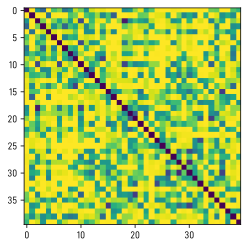

In [111]:
 plt.imshow(fac.optimum(runs=torch.argmin(fac.report.loss_best)))

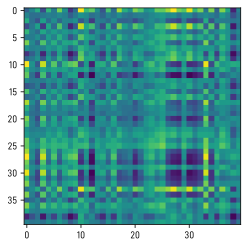

In [122]:
 plt.imshow(svd2_approx)

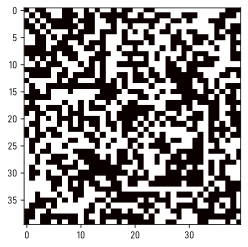

In [113]:
plt.imshow(K00, cmap='hot', interpolation='nearest')
plt.show()

In [121]:
svd1_approx = torch.tensor((U0[:, :1] * S0[None, :1]) @ V0[:1, :])

In [112]:
round(float(torch.min(error).cpu().detach().numpy()), 7)

0.1717081

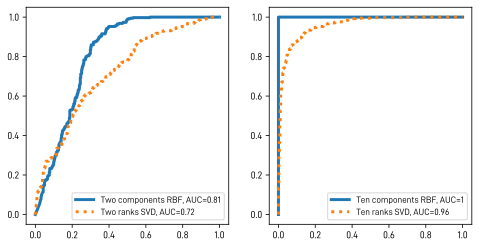

In [120]:
fig = plt.figure(figsize=plt.figaspect(0.5))
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 1)

ax.plot(fpr2, tpr2, label='Two components RBF, AUC=0.81',  linewidth=3, linestyle='-')
ax.plot(fpr_svd2, tpr_svd2, label='Two ranks SVD, AUC=0.72',  linewidth=3, linestyle=':')
ax.legend(loc='lower right', fontsize=9)

ax = fig.add_subplot(1, 2, 2)

ax.plot(fpr, tpr, label='Ten components RBF, AUC=1',  linewidth=3, linestyle='-')
ax.plot(fpr_svd10, tpr_svd10, label='Ten ranks SVD, AUC=0.96',  linewidth=3, linestyle=':')
ax.legend(loc='lower right', fontsize=9)


plt.show()

In [125]:
K00

tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [1., 0., 1.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 1., 1., 1.],
        ...,
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 1.],
        [0., 1., 1.,  ..., 0., 1., 0.]])